# DirectLiNGAM

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

['1.20.1', '1.2.3', '0.16', '1.5.2']


# data

In [19]:
data_size = 10000

In [20]:
x3 = np.random.uniform(size=data_size)
x0 = 3.0*x3 + np.random.uniform(size=data_size)
x2 = 6.0*x3 + np.random.uniform(size=data_size)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=data_size)
x5 = 4.0*x0 + np.random.uniform(size=data_size)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=data_size)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

In [21]:
X.head()

,x0,x1,x2,x3,x4,x5
0,1.250610,6.311922,0.782338,0.113208,9.462228,5.765668
1,0.721127,4.550207,1.011937,0.047394,5.452665,3.565805
2,2.171038,14.150627,3.331538,0.391321,14.856894,9.475048
3,2.940119,20.158074,5.207998,0.710421,18.956596,12.275909
4,3.024484,18.967418,4.497211,0.749473,20.245130,13.041028


# 正解の因果グラフ

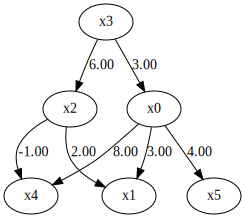

In [22]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

dot = make_dot(m)

# Save pdf
dot.render('dag')

# Save png
dot.format = 'png'
dot.render('dag')

dot

# 因果探索

In [23]:
model = lingam.DirectLiNGAM()
model.fit(X)

## 推定された因果の順番

In [24]:
model.causal_order_

[3, 2, 0, 4, 5, 1]

## 推定された因果効果

In [25]:
model.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  2.979,  0.   ,  0.   ],
       [ 2.982,  0.   ,  1.988,  0.108,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  6.002,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 7.987,  0.   , -0.993,  0.   ,  0.   ,  0.   ],
       [ 3.986,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

## （まとめ）推定された因果グラフ

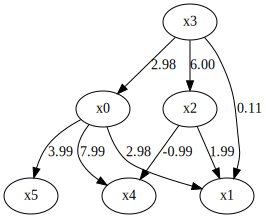

In [26]:
make_dot(model.adjacency_matrix_)

## 変数間のp値

In [27]:
model.get_error_independence_p_values(X)

KeyboardInterrupt: 